# Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.offline
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
plotly.offline.init_notebook_mode()

# Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Read the Data

In [4]:
df = pd.read_csv('nobel_prize_data.csv')
df.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16              Paris   
2    Individual        Emil Adolf von Behring  1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy  1822-05-20              Paris   
4    Individual             Jean Henry Dunant  1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning


In [5]:
df.shape

(962, 16)

In [6]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [7]:
# Year of first awarded Nobel Prize
df["year"].min()

1901

In [8]:
# Most recent year in dataset
df["year"].max()

2020

**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [9]:
df.duplicated().values.any()

False

### Check for NaN Values

In [10]:
df.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [11]:
col_subset = ["year", "category", "laureate_type", "birth_date", "full_name", "organization_name"]

In [12]:
df.loc[df["birth_date"].isna()][col_subset]

year category laureate_type birth_date  \
24   1904    Peace  Organization        NaN   
60   1910    Peace  Organization        NaN   
89   1917    Peace  Organization        NaN   
200  1938    Peace  Organization        NaN   
215  1944    Peace  Organization        NaN   
237  1947    Peace  Organization        NaN   
238  1947    Peace  Organization        NaN   
283  1954    Peace  Organization        NaN   
348  1963    Peace  Organization        NaN   
349  1963    Peace  Organization        NaN   
366  1965    Peace  Organization        NaN   
399  1969    Peace  Organization        NaN   
479  1977    Peace  Organization        NaN   
523  1981    Peace  Organization        NaN   
558  1985    Peace  Organization        NaN   
588  1988    Peace  Organization        NaN   
659  1995    Peace  Organization        NaN   
682  1997    Peace  Organization        NaN   
703  1999    Peace  Organization        NaN   
730  2001    Peace  Organization        NaN   
778  2005    Peace  Organization        NaN   
788  2006    Peace  Organization        NaN   
801  2007    Peace  Organization        NaN   
860  2012    Peace  Organization        NaN   
873  2013    Peace  Organization        NaN   
897  2015    Peace  Organization        NaN   
919  2017    Peace  Organization        NaN   
958  2020    Peace  Organization        NaN   

                                             full_name organization_name  
24   Institut de droit international (Institute of ...               NaN  
60   Bureau international permanent de la Paix (Per...               NaN  
89   Comité international de la Croix Rouge (Intern...               NaN  
200  Office international Nansen pour les Réfugiés ...               NaN  
215  Comité international de la Croix Rouge (Intern...               NaN  
237   American Friends Service Committee (The Quakers)               NaN  
238              Friends Service Council (The Quakers)               NaN  
283  Office of the United Nations High Commissioner...               NaN  
348  Comité international de la Croix Rouge (Intern...               NaN  
349  Ligue des Sociétés de la Croix-Rouge (League o...               NaN  
366            United Nations Children's Fund (UNICEF)               NaN  
399         International Labour Organization (I.L.O.)               NaN  
479                              Amnesty International               NaN  
523  Office of the United Nations High Commissioner...               NaN  
558  International Physicians for the Prevention of...               NaN  
588                 United Nations Peacekeeping Forces               NaN  
659   Pugwash Conferences on Science and World Affairs               NaN  
682     International Campaign to Ban Landmines (ICBL)               NaN  
703                           Médecins Sans Frontières               NaN  
730                              United Nations (U.N.)               NaN  
778          International Atomic Energy Agency (IAEA)               NaN  
788                                       Grameen Bank               NaN  
801   Intergovernmental Panel on Climate Change (IPCC)               NaN  
860                                European Union (EU)               NaN  
873  Organisation for the Prohibition of Chemical W...               NaN  
897                          National Dialogue Quartet               NaN  
919  International Campaign to Abolish Nuclear Weap...               NaN  
958                         World Food Programme (WFP)               NaN

We can see that thee NaN values for birth date are due to many organisations in the dataset. This makes sense. However, we can also see that the organisation names are under the "full_name" column which is why the "organization_name" column contains NaN values.

In [13]:
df.loc[df["organization_name"].isna()][col_subset]

year    category laureate_type  birth_date  \
1    1901  Literature    Individual  1839-03-16   
3    1901       Peace    Individual  1822-05-20   
4    1901       Peace    Individual  1828-05-08   
7    1902  Literature    Individual  1817-11-30   
9    1902       Peace    Individual  1843-05-21   
..    ...         ...           ...         ...   
932  2018       Peace    Individual  1993-07-02   
942  2019  Literature    Individual  1942-12-06   
946  2019       Peace    Individual  1976-08-15   
954  2020  Literature    Individual  1943-04-22   
958  2020       Peace  Organization         NaN   

                              full_name organization_name  
1                       Sully Prudhomme               NaN  
3                        Frédéric Passy               NaN  
4                     Jean Henry Dunant               NaN  
7    Christian Matthias Theodor Mommsen               NaN  
9                  Charles Albert Gobat               NaN  
..                                  ...               ...  
932                         Nadia Murad               NaN  
942                        Peter Handke               NaN  
946                      Abiy Ahmed Ali               NaN  
954                        Louise Glück               NaN  
958          World Food Programme (WFP)               NaN  

[255 rows x 6 columns]

Filtering NaN values by "organization_name", we see that the NaN values could be due to many of these winners not being affiliated with a University or research instituition. These winners tend to be in the Literature or Peace category.

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Birth Date to Datetime

In [14]:
df["birth_date"] = pd.to_datetime(df["birth_date"])
df.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

#### Add a Column with the Prize Share as a Percentage

In [15]:
seperated_values = df["prize_share"].str.split("/", expand=True)
numerators = pd.to_numeric(seperated_values[0])
denomiators = pd.to_numeric(seperated_values[1])

In [16]:
df["share_pct"] = (numerators/denomiators)*100
df.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD     100.00  
1               NaN                  NaN  FRA     100.00  
2           Marburg              Germany  POL     100.00  
3               NaN                  NaN  FRA      50.00  
4               NaN                  NaN  CHE      50.00

## Percentage of Male vs. Female Laureates

In [17]:
gender_pct  =df["sex"].value_counts().to_frame().reset_index()
gender_pct.columns = ["Sex", "Count"]
gender_pct

Sex  Count
0    Male    876
1  Female     58

In [18]:
fig = px.pie(data_frame=gender_pct,
             labels="Sex",
             values="Count",
             hole=0.6, 
             title="Percentage of Male vs Female Winners",
             names="Sex")


fig.show()

## Who were the first 3 Women to Win the Nobel Prize?

* What are the names of the first 3 female Nobel laureates? 
* What did they win the prize for? 

In [19]:
df[df["sex"] == "Female"][:3]

year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share  \
18  "in recognition of the extraordinary services ...         1/4   
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name  \
18    Individual                        Marie Curie, née Sklodowska   
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

   birth_date birth_city                     birth_country  \
18 1867-11-07     Warsaw           Russian Empire (Poland)   
29 1843-06-09     Prague  Austrian Empire (Czech Republic)   
51 1858-11-20   Mårbacka                            Sweden   

   birth_country_current     sex organization_name organization_city  \
18                Poland  Female               NaN               NaN   
29        Czech Republic  Female               NaN               NaN   
51                Sweden  Female               NaN               NaN   

   organization_country  ISO  share_pct  
18                  NaN  POL      25.00  
29                  NaN  CZE     100.00  
51                  NaN  SWE     100.00

We can see that the first 3 women to win the Nobel Prize were not part of any organisation. 

## Find the Repeat Winners

In [20]:
is_winner = df.duplicated(subset=['full_name'], keep=False)
multiple_winners = df[is_winner]
print(f"There are {multiple_winners['full_name'].nunique()} repeat winners.")

There are 6 repeat winners.


In [21]:
col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[multiple_winners["full_name"].duplicated()][col_subset]

year   category laureate_type  \
62   1911  Chemistry    Individual   
215  1944      Peace  Organization   
340  1962      Peace    Individual   
348  1963      Peace  Organization   
424  1972    Physics    Individual   
505  1980  Chemistry    Individual   
523  1981      Peace  Organization   

                                             full_name  
62                         Marie Curie, née Sklodowska  
215  Comité international de la Croix Rouge (Intern...  
340                                 Linus Carl Pauling  
348  Comité international de la Croix Rouge (Intern...  
424                                       John Bardeen  
505                                   Frederick Sanger  
523  Office of the United Nations High Commissioner...

We can see that 4 of the repeat winners are indivduals

## Number of Prizes per Category


* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [22]:
df["category"].unique()

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics',
       'Economics'], dtype=object)

In [23]:
prizes_per_category = df["category"].value_counts().to_frame().reset_index()
prizes_per_category.columns = ["Category", "Count"]

In [24]:
fig = px.bar(data_frame=prizes_per_category,
             x="Category",
             y="Count",
             title="Prizes per Category",
             color=prizes_per_category["Count"],
             color_continuous_scale="Aggrnyl")

fig.update_layout(yaxis_title="Number of Prizes",
                  coloraxis_colorbar=dict(title="Number of Prizes"))


fig.show()


* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [25]:
df[df["category"] == "Economics"].head(1)

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   

    laureate_type      full_name birth_date birth_city birth_country  \
393    Individual  Jan Tinbergen 1903-04-12  the Hague   Netherlands   

    birth_country_current   sex                    organization_name  \
393           Netherlands  Male  The Netherlands School of Economics   

    organization_city organization_country  ISO  share_pct  
393         Rotterdam          Netherlands  NLD      50.00

We can see that the first economics award was given in 1969 which makes economics a relatively newer category if we compare to the first award given in 1901. This could explain why economics has had the least number of prizes awarded.

## Male and Female Winners by Category


In [26]:
cat_gender = df.groupby(["category", "sex"], as_index=False).agg({"prize":pd.Series.count})
cat_gender.sort_values(by="prize", ascending=False, inplace=True)
cat_gender

category     sex  prize
11     Physics    Male    212
7     Medicine    Male    210
1    Chemistry    Male    179
5   Literature    Male    101
9        Peace    Male     90
3    Economics    Male     84
8        Peace  Female     17
4   Literature  Female     16
6     Medicine  Female     12
0    Chemistry  Female      7
10     Physics  Female      4
2    Economics  Female      2

In [27]:
fig = px.bar(data_frame=cat_gender,
             x="category",
             y="prize",
             title="Number of Prizes Awarded per Category Split by Men and Women",
             color=cat_gender["sex"])

fig.update_layout(xaxis_title="Nobel Prize Category",
                  yaxis_title="Number of Prizes")

fig.show()

We see that overall the imbalance is pretty large with physics, economics, and chemistry. Women are somewhat more represented in categories of Medicine, Literature and Peace.

## Number of Prizes Awarded Over Time


In [28]:
prizes_per_year = df.groupby("year", as_index=False)["prize"].count()

In [29]:
moving_average = prizes_per_year["prize"].rolling(window=5).mean()
moving_average

0       NaN
1       NaN
2       NaN
3       NaN
4      6.20
       ... 
112   11.60
113   12.00
114   12.00
115   12.20
116   12.40
Name: prize, Length: 117, dtype: float64

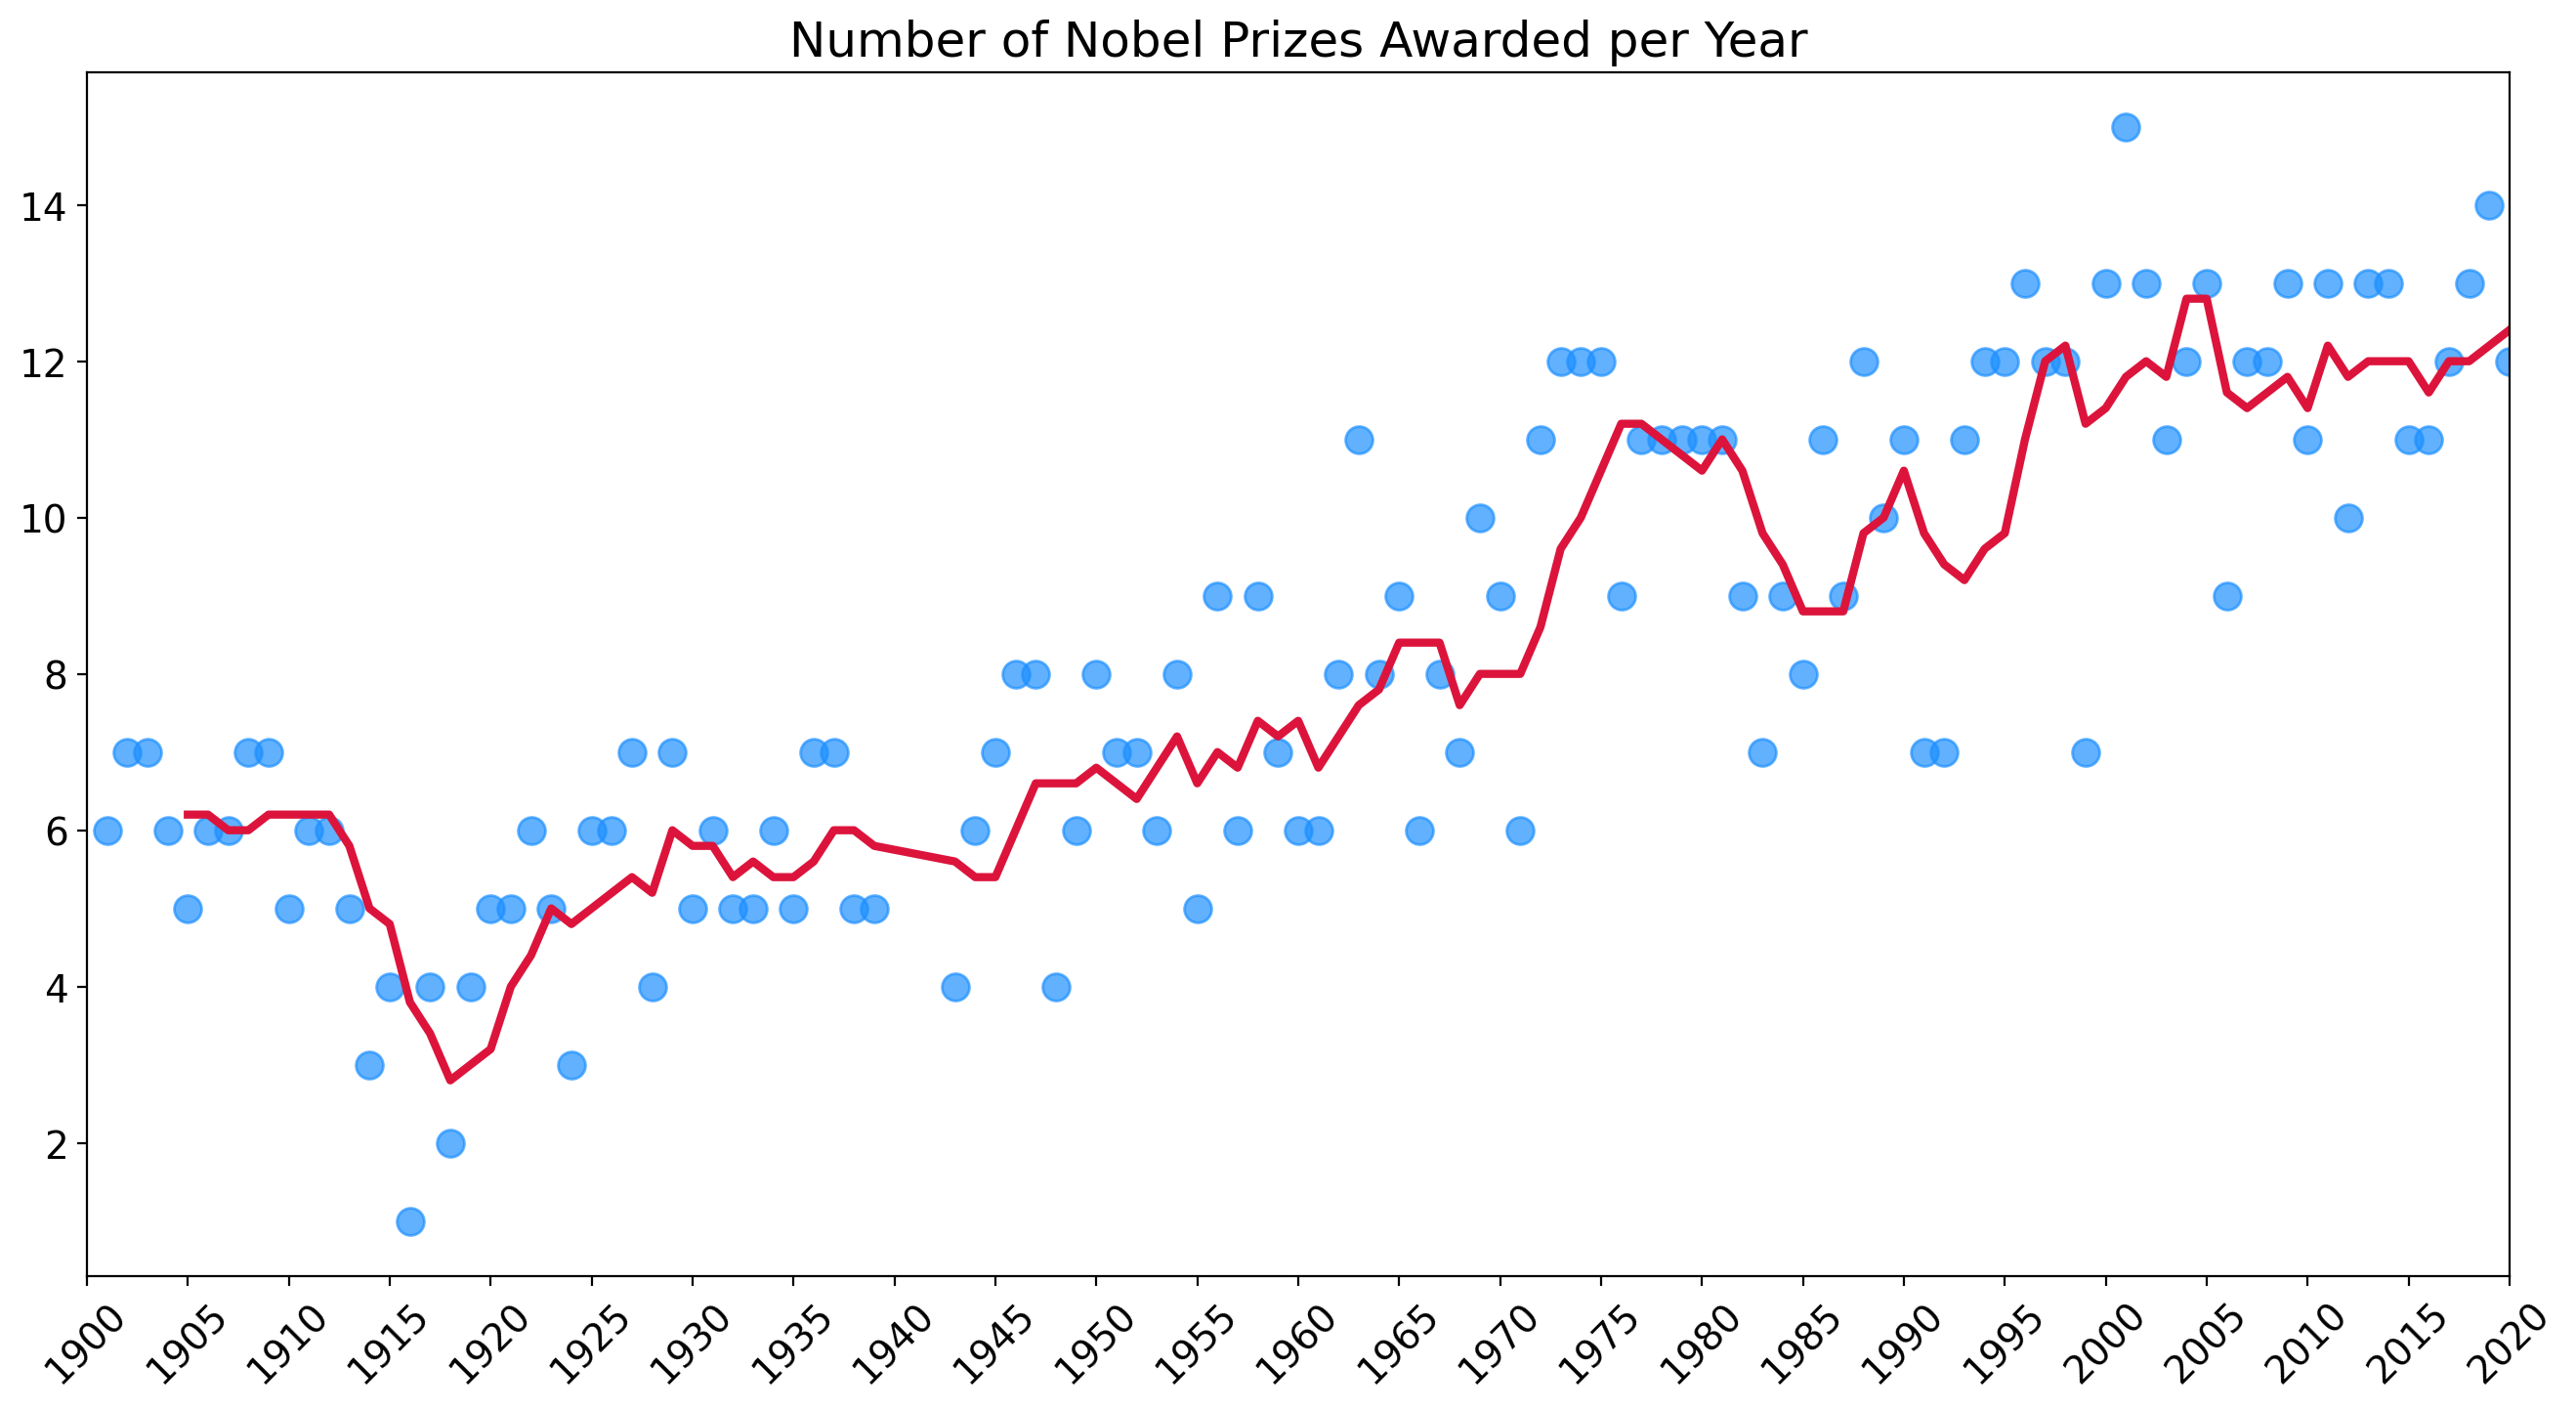

In [30]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
 
ax.scatter(x=prizes_per_year["year"], 
           y=prizes_per_year["prize"], 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax.plot(prizes_per_year["year"], 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

## Are More Prizes Shared Than Before?


In [31]:
yearly_avg_share = df.groupby("year", as_index=False)["share_pct"].mean()
yearly_avg_share

year  share_pct
0    1901      83.33
1    1902      71.43
2    1903      71.43
3    1904      83.33
4    1905     100.00
..    ...        ...
112  2016      54.55
113  2017      50.00
114  2018      46.15
115  2019      42.86
116  2020      50.00

[117 rows x 2 columns]

In [32]:
share_moving_avg = yearly_avg_share["share_pct"].rolling(window=5).mean()
share_moving_avg

0       NaN
1       NaN
2       NaN
3       NaN
4     81.90
       ... 
112   52.28
113   50.28
114   50.28
115   49.62
116   48.71
Name: share_pct, Length: 117, dtype: float64

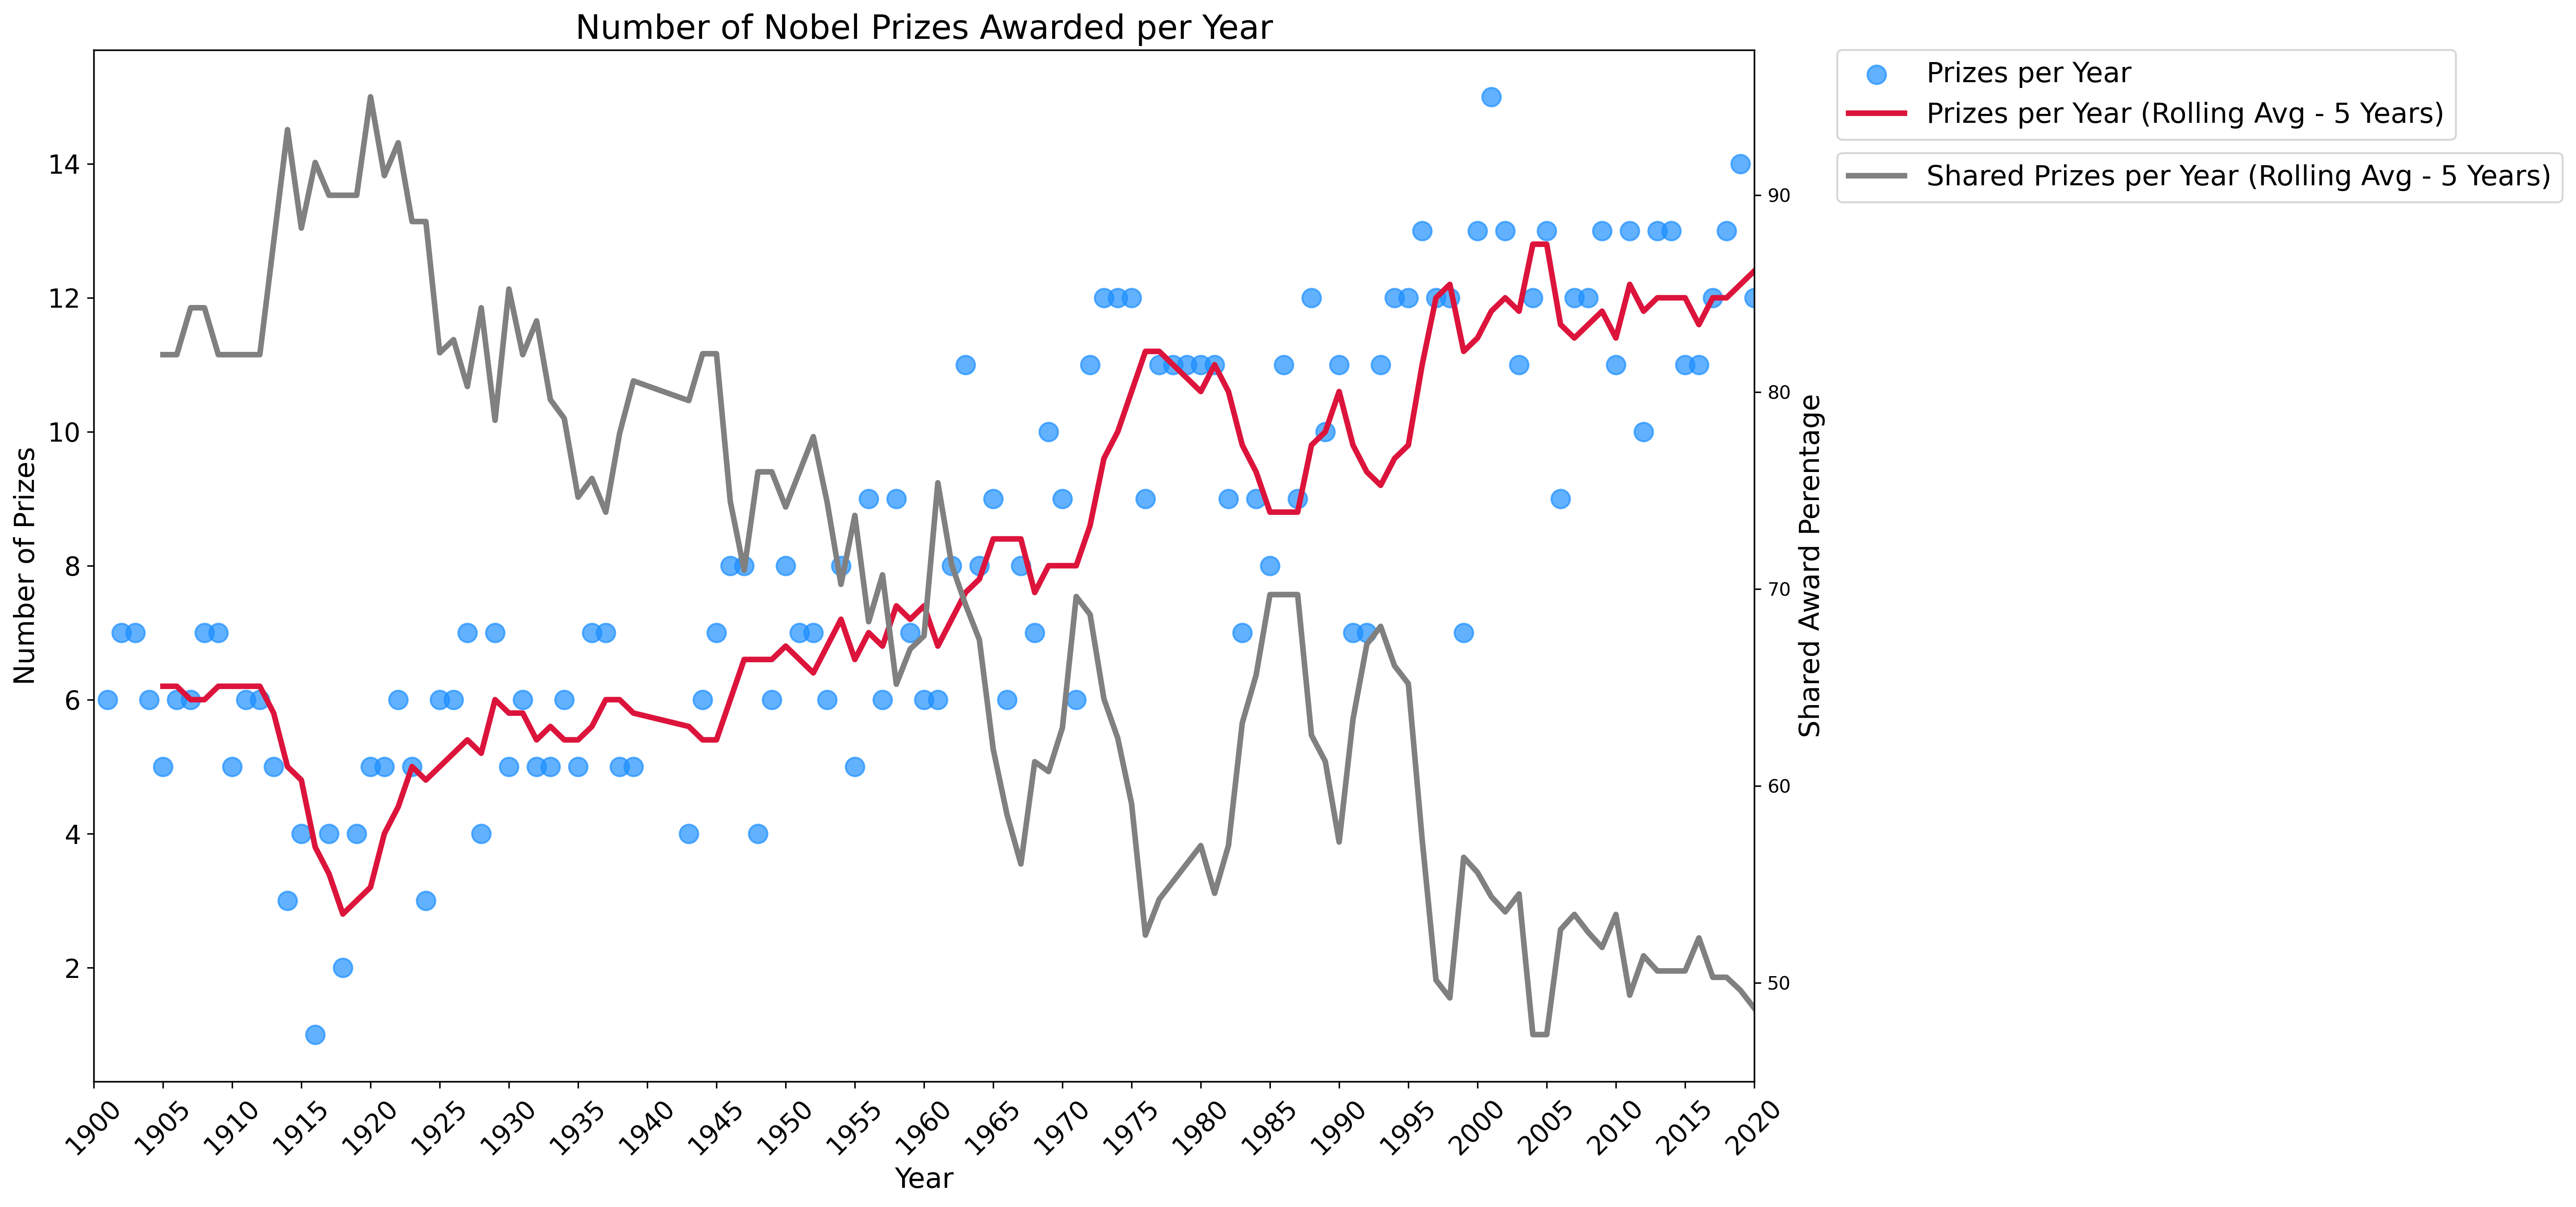

In [33]:
plt.figure(figsize=(16,10), dpi=300)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)
 
scatter = ax1.scatter(x=prizes_per_year["year"], 
           y=prizes_per_year["prize"], 
           c='dodgerblue',
           alpha=0.7,
           s=100,
           label="Prizes per Year")
 
line1 = ax1.plot(prizes_per_year["year"], 
        moving_average.values, 
        c='crimson', 
        linewidth=3,
        label="Prizes per Year (Rolling Avg - 5 Years)")

 

line2 = ax2.plot(prizes_per_year["year"], 
        share_moving_avg.values, 
        c='grey', 
        linewidth=3,
        label="Shared Prizes per Year (Rolling Avg - 5 Years)")

ax1.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0., fontsize=15)
ax2.legend(bbox_to_anchor=(1.05, 0.9),loc='upper left', borderaxespad=0., fontsize=15)

ax1.set_xlabel("Year", fontsize=15)
ax1.set_ylabel("Number of Prizes", fontsize=15)
ax2.set_ylabel("Shared Award Perentage", fontsize=15)
 
plt.show()

There is clearly an upward trend in the number of prizes being given out as more and more prizes are shared. Also, more prizes are being awarded from 1969 onwards because of the addition of the economics category. We also see that very few prizes were awarded during the first and second world wars.

## The Countries with the Most Nobel Prizes

If we look at the entries in the `birth_country`, we see that some countries no longer exist! These include the Soviet Union or Czechoslovakia for example. Hence, using `birth_country_current` is better, since it has the country name which controls the city where the laureate was born. Notice that this does not determine the laureates' nationality since people's nationalities can change as they emigrate and acquire different citizenship or get married and change citizenship. What this boils down to is that we will have to be clear about the assumptions that we will make in the upcoming analysis.

In [34]:
top20_countries = df.groupby("birth_country_current", as_index=False)["prize"].count().sort_values(by="prize", ascending=True)[-20:].reset_index(drop=True)
top20_countries

birth_country_current  prize
0                    Belgium      9
1                    Hungary      9
2                      India      9
3                  Australia     10
4                    Denmark     12
5                     Norway     12
6                      China     12
7                Netherlands     18
8                    Austria     18
9                      Italy     19
10               Switzerland     19
11                    Canada     20
12                    Russia     26
13                     Japan     27
14                    Poland     27
15                    Sweden     29
16                    France     57
17                   Germany     84
18            United Kingdom    105
19  United States of America    281

In [35]:
fig = px.bar(data_frame=top20_countries,
             x="prize",
             y="birth_country_current",
             color="prize",
             color_continuous_scale="Viridis",
             title="Top 20 Countries by Number of Prizes",
             orientation="h")

fig.update_layout(xaxis_title="Number of Prizes",
                  yaxis_title="Country",
                  coloraxis_showscale=False,
                  template="plotly_white")

fig.show()

The United States has a massive number of prizes by this measure. The UK and Germany are in second and third place respectively.

## Choropleth Map to Show the Number of Prizes Won by Country



In [36]:
df_countries = df.groupby(['birth_country_current', 'ISO'], 
                               as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)

birth_country_current  ISO  prize
74  United States of America  USA    281
73            United Kingdom  GBR    105
26                   Germany  DEU     84
25                    France  FRA     57
67                    Sweden  SWE     29
..                       ...  ...    ...
32                   Iceland  ISL      1
47                Madagascar  MDG      1
34                 Indonesia  IDN      1
36                      Iraq  IRQ      1
78                  Zimbabwe  ZWE      1

[79 rows x 3 columns]

In [37]:
fig = px.choropleth(df_countries,
                    locations='ISO',
                    color='prize', 
                    hover_name='birth_country_current', 
                    color_continuous_scale=px.colors.sequential.matter)

fig.update_layout(coloraxis_showscale=True,)
 
fig.show()

## In Which Categories are the Different Countries Winning Prizes? 



In [38]:
cat_country = df.groupby(["birth_country_current", "category"], as_index=False)["prize"].count()
cat_country.sort_values(by="prize", ascending=False, inplace=True)
cat_country

birth_country_current   category  prize
204  United States of America   Medicine     78
206  United States of America    Physics     70
201  United States of America  Chemistry     55
202  United States of America  Economics     49
198            United Kingdom   Medicine     28
..                        ...        ...    ...
97                       Iraq      Peace      1
99                    Ireland   Medicine      1
100                   Ireland    Physics      1
102                    Israel  Economics      1
210                  Zimbabwe      Peace      1

[211 rows x 3 columns]

In [39]:
merged_df = pd.merge(cat_country, top20_countries, on="birth_country_current")
merged_df.columns = ["birth_country_current", "category", "cat_prize", "total_prize"]
merged_df.sort_values(by="total_prize", ascending=True, inplace=True)
merged_df

birth_country_current   category  cat_prize  total_prize
109                     India    Physics          1            9
108                     India      Peace          1            9
88                    Belgium      Peace          3            9
89                    Belgium   Medicine          3            9
90                    Belgium  Chemistry          1            9
..                        ...        ...        ...          ...
4    United States of America      Peace         19          281
3    United States of America  Economics         49          281
2    United States of America  Chemistry         55          281
1    United States of America    Physics         70          281
0    United States of America   Medicine         78          281

[110 rows x 4 columns]

In [40]:
fig = px.bar(data_frame=merged_df,
             x="cat_prize",
             y="birth_country_current",
             title="Top 20 Countries by Number of Prizes and Category",
             color="category",
             color_continuous_scale="Viridis",
             orientation="h")

fig.update_layout(xaxis_title="Number of Prizes",
                  yaxis_title="Country",
                  legend_title_text="Category",
                  height=700,
                  width=1000)

fig.show()

### Number of Prizes Won by Each Country Over Time


In [41]:
prize_by_year = df.groupby(by=['birth_country_current', 'year'], as_index=False).count().sort_values('year').reset_index()[['year', 'birth_country_current', 'prize']]
prize_by_year

year     birth_country_current  prize
0    1901                    France      2
1    1901                    Poland      1
2    1901                   Germany      1
3    1901               Netherlands      1
4    1901               Switzerland      1
..    ...                       ...    ...
622  2019                   Austria      1
623  2020                   Germany      1
624  2020  United States of America      7
625  2020            United Kingdom      2
626  2020                    France      1

[627 rows x 3 columns]

In [42]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True) 

In [43]:
fig = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
 
fig.update_layout(xaxis_title='Year',
                  yaxis_title='Number of Prizes',
                  template="plotly_white",
                  legend_title_text="Country")
 
fig.show()

What we see is that the United States really started to take off after the Second World War which decimated Europe. Prior to that, the Nobel prize was pretty much a European affair. Very few laureates were chosen from other parts of the world. This has changed dramatically in the last 40 years or so. There are many more countries represented today than in the early days. Interestingly we also see that the UK and Germany traded places in the 70s and 90s on the total number of prizes won. Sweden being 5th place pretty consistently over many decades is quite interesting too. Perhaps this reflects a little bit of home bias?

# What are the Top Research Organisations?


In [44]:
top20_research = df["organization_name"].value_counts()[:20]
top20_research.sort_values(ascending=True, inplace=True)
top20_research

Sorbonne University                              7
Harvard Medical School                           7
Institut Pasteur                                 7
London University                                7
Bell Laboratories                                8
Cornell University                               8
Yale University                                  9
MRC Laboratory of Molecular Biology             10
University of Oxford                            12
Rockefeller University                          13
Max-Planck-Institut                             13
Princeton University                            15
California Institute of Technology (Caltech)    17
Columbia University                             17
University of Cambridge                         18
University of Chicago                           20
Massachusetts Institute of Technology (MIT)     21
Stanford University                             23
Harvard University                              29
University of California       

In [45]:
fig = px.bar(x=top20_research.values,
             y=top20_research.index,
             title="Top 20 Research Institutions by Number of Prizes",
             color=top20_research.values,
             color_continuous_scale="Viridis",
             orientation="h")

fig.update_layout(xaxis_title="Number of Prizes",
                  yaxis_title="Research Institution",
                  template="plotly_white",
                  coloraxis_showscale=False)

fig.show()


# Which Cities Make the Most Discoveries? 

In [46]:
top20_city = df["organization_city"].value_counts()[:20]
top20_city.sort_values(ascending=True)

Ithaca, NY          8
Los Angeles, CA     8
New Haven, CT       9
Heidelberg          9
Boston, MA          9
Munich              9
Moscow             10
Stockholm          10
Berlin             12
Oxford             12
Pasadena, CA       17
Princeton, NJ      19
Chicago, IL        20
Berkeley, CA       21
Stanford, CA       24
Paris              25
London             27
Cambridge          31
New York, NY       45
Cambridge, MA      50
Name: organization_city, dtype: int64

In [47]:
fig = px.bar(x=top20_city.values,
             y=top20_city.index,
             title="Top 20 Research Citites by Number of Prizes",
             color=top20_city.values,
             color_continuous_scale="Viridis",
             orientation="h")

fig.update_layout(xaxis_title="Number of Prizes",
                  yaxis_title="City",
                  coloraxis_showscale=False,
                  template="plotly_white")

fig.update_yaxes(dict(autorange="reversed"))

fig.show()

# Where are Nobel Laureates Born?

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [48]:
top20_birth_city = df["birth_city"].value_counts()[:20].sort_values()

In [49]:
fig = px.bar(x=top20_birth_city.values,
             y=top20_birth_city.index,
             title="Where are Nobel Laureates born?",
             color=top20_birth_city.values,
             color_continuous_scale="Plasma",
             orientation="h")

fig.update_layout(xaxis_title="Number of Laureates",
                  yaxis_title="City of Birth",
                  coloraxis_showscale=False,
                  template="plotly_white")

fig.show()

A higher population definitely means that there's a higher chance of a Nobel laureate to be born there. New York, Paris, and London are all very populous. However, Vienna and Budapest are not and still produced many prize winners. That said, much of the ground-breaking research does not take place in big population centres, so the list of birth cities is quite different from the list above. Cambridge Massachusets, Stanford, Berkely and Cambridge (UK) are all the places where many discoveries are made, but they are not the birthplaces of laureates.

# Plotly Sunburst Chart: Combine Country, City, and Organisation




In [50]:
country_city_org = df.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})
 
country_city_org = country_city_org.sort_values('prize', ascending=False)
country_city_org

organization_country     organization_city  \
205  United States of America         Cambridge, MA   
280  United States of America          Stanford, CA   
206  United States of America         Cambridge, MA   
209  United States of America           Chicago, IL   
195  United States of America          Berkeley, CA   
..                        ...                   ...   
110                     Japan               Sapporo   
111                     Japan                 Tokyo   
112                     Japan                 Tokyo   
113                     Japan                 Tokyo   
290  United States of America  Yorktown Heights, NY   

                               organization_name  prize  
205                           Harvard University     29  
280                          Stanford University     23  
206  Massachusetts Institute of Technology (MIT)     21  
209                        University of Chicago     20  
195                     University of California     19  
..                                           ...    ...  
110                          Hokkaido University      1  
111                      Asahi Kasei Corporation      1  
112                          Kitasato University      1  
113                Tokyo Institute of Technology      1  
290         IBM Thomas J. Watson Research Center      1  

[291 rows x 4 columns]

In [51]:
burst = px.sunburst(country_city_org, 
                    path=['organization_country', 'organization_city', 'organization_name'], 
                    values='prize',
                    title='Where do Discoveries Take Place?',
                   )
 
burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
 
burst.show()

France is a great example of concentration. Practically all the organisations affiliated with Nobel prize winners are in Paris. In contrast, scientific discoveries are much more spread out across Germany. Meanwhile, the UK is dominated by Cambridge and London.

# Patterns in the Laureate Age at the Time of the Award

How old were the Laureates When they won the Prize?



In [52]:
df["winning_age"] = df["year"] - df["birth_date"].dt.year

In [53]:
df.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  winning_age  
0            Berlin              Germany  NLD     100.00        49.00  
1               NaN                  NaN  FRA     100.00        62.00  
2           Marburg              Germany  POL     100.00        47.00  
3               NaN                  NaN  FRA      50.00        79.00  
4               NaN                  NaN  CHE      50.00        73.00

### Who were the oldest and youngest winners?

* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?

In [54]:
display(df.nlargest(n=1, columns="winning_age"))
display(df.nsmallest(n=1, columns="winning_age"))

year   category                              prize  \
937  2019  Chemistry  The Nobel Prize in Chemistry 2019   

                                         motivation prize_share laureate_type  \
937  “for the development of lithium-ion batteries”         1/3    Individual   

           full_name birth_date birth_city birth_country  \
937  John Goodenough 1922-07-25       Jena       Germany   

    birth_country_current   sex    organization_name organization_city  \
937               Germany  Male  University of Texas         Austin TX   

         organization_country  ISO  share_pct  winning_age  
937  United States of America  DEU      33.33        97.00

year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   

    laureate_type         full_name birth_date birth_city birth_country  \
885    Individual  Malala Yousafzai 1997-07-12    Mingora      Pakistan   

    birth_country_current     sex organization_name organization_city  \
885              Pakistan  Female               NaN               NaN   

    organization_country  ISO  share_pct  winning_age  
885                  NaN  PAK      50.00        17.00

### Descriptive Statistics for the Laureate Age at Time of Award

 

In [55]:
df["winning_age"].describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

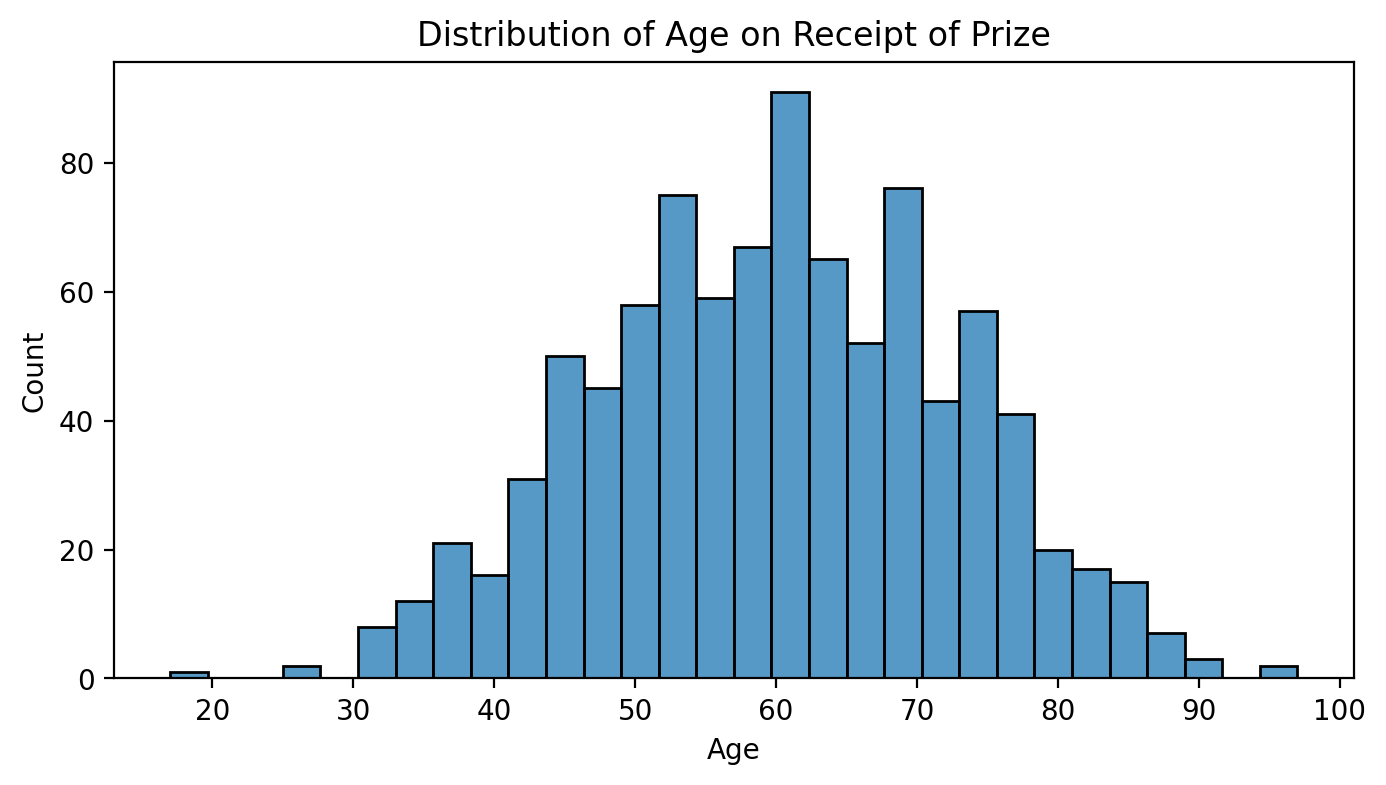

In [56]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df,
             x="winning_age",
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()


### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?


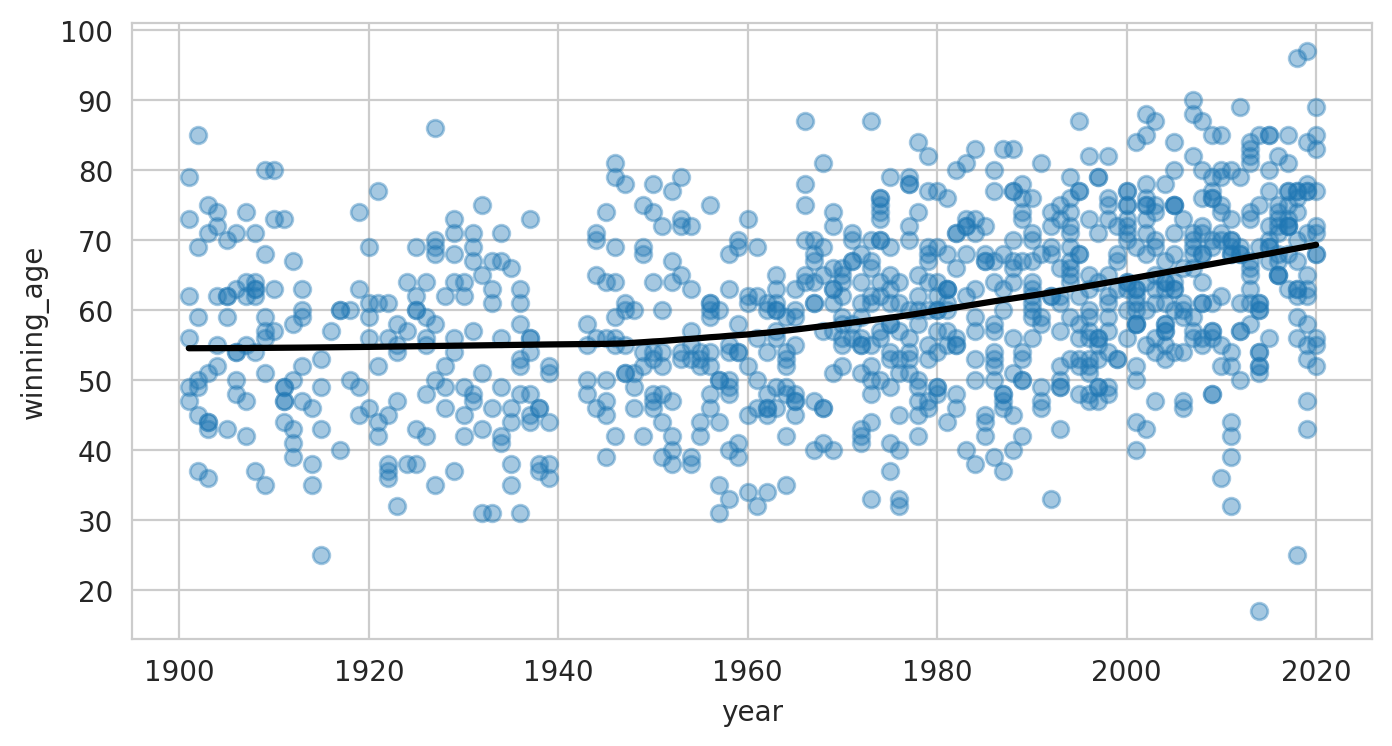

In [57]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show()

Using the lowess parameter allows us to plot a local linear regression. This means the best fit line is still linear, but it's more like a moving average which gives us a non-linear shape across the entire series. This clearly shows how the Nobel laureates are getting their award later and later in life. From 1900 to around 1950, the laureates were around 55 years old, but these days they are closer to 70 years old when they get their award. The other thing that we see in the chart is that in the last 10 years the spread has increased. We've had more very young and very old winners. In 1950s/60s winners were between 30 and 80 years old. Lately, that range has widened.

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 


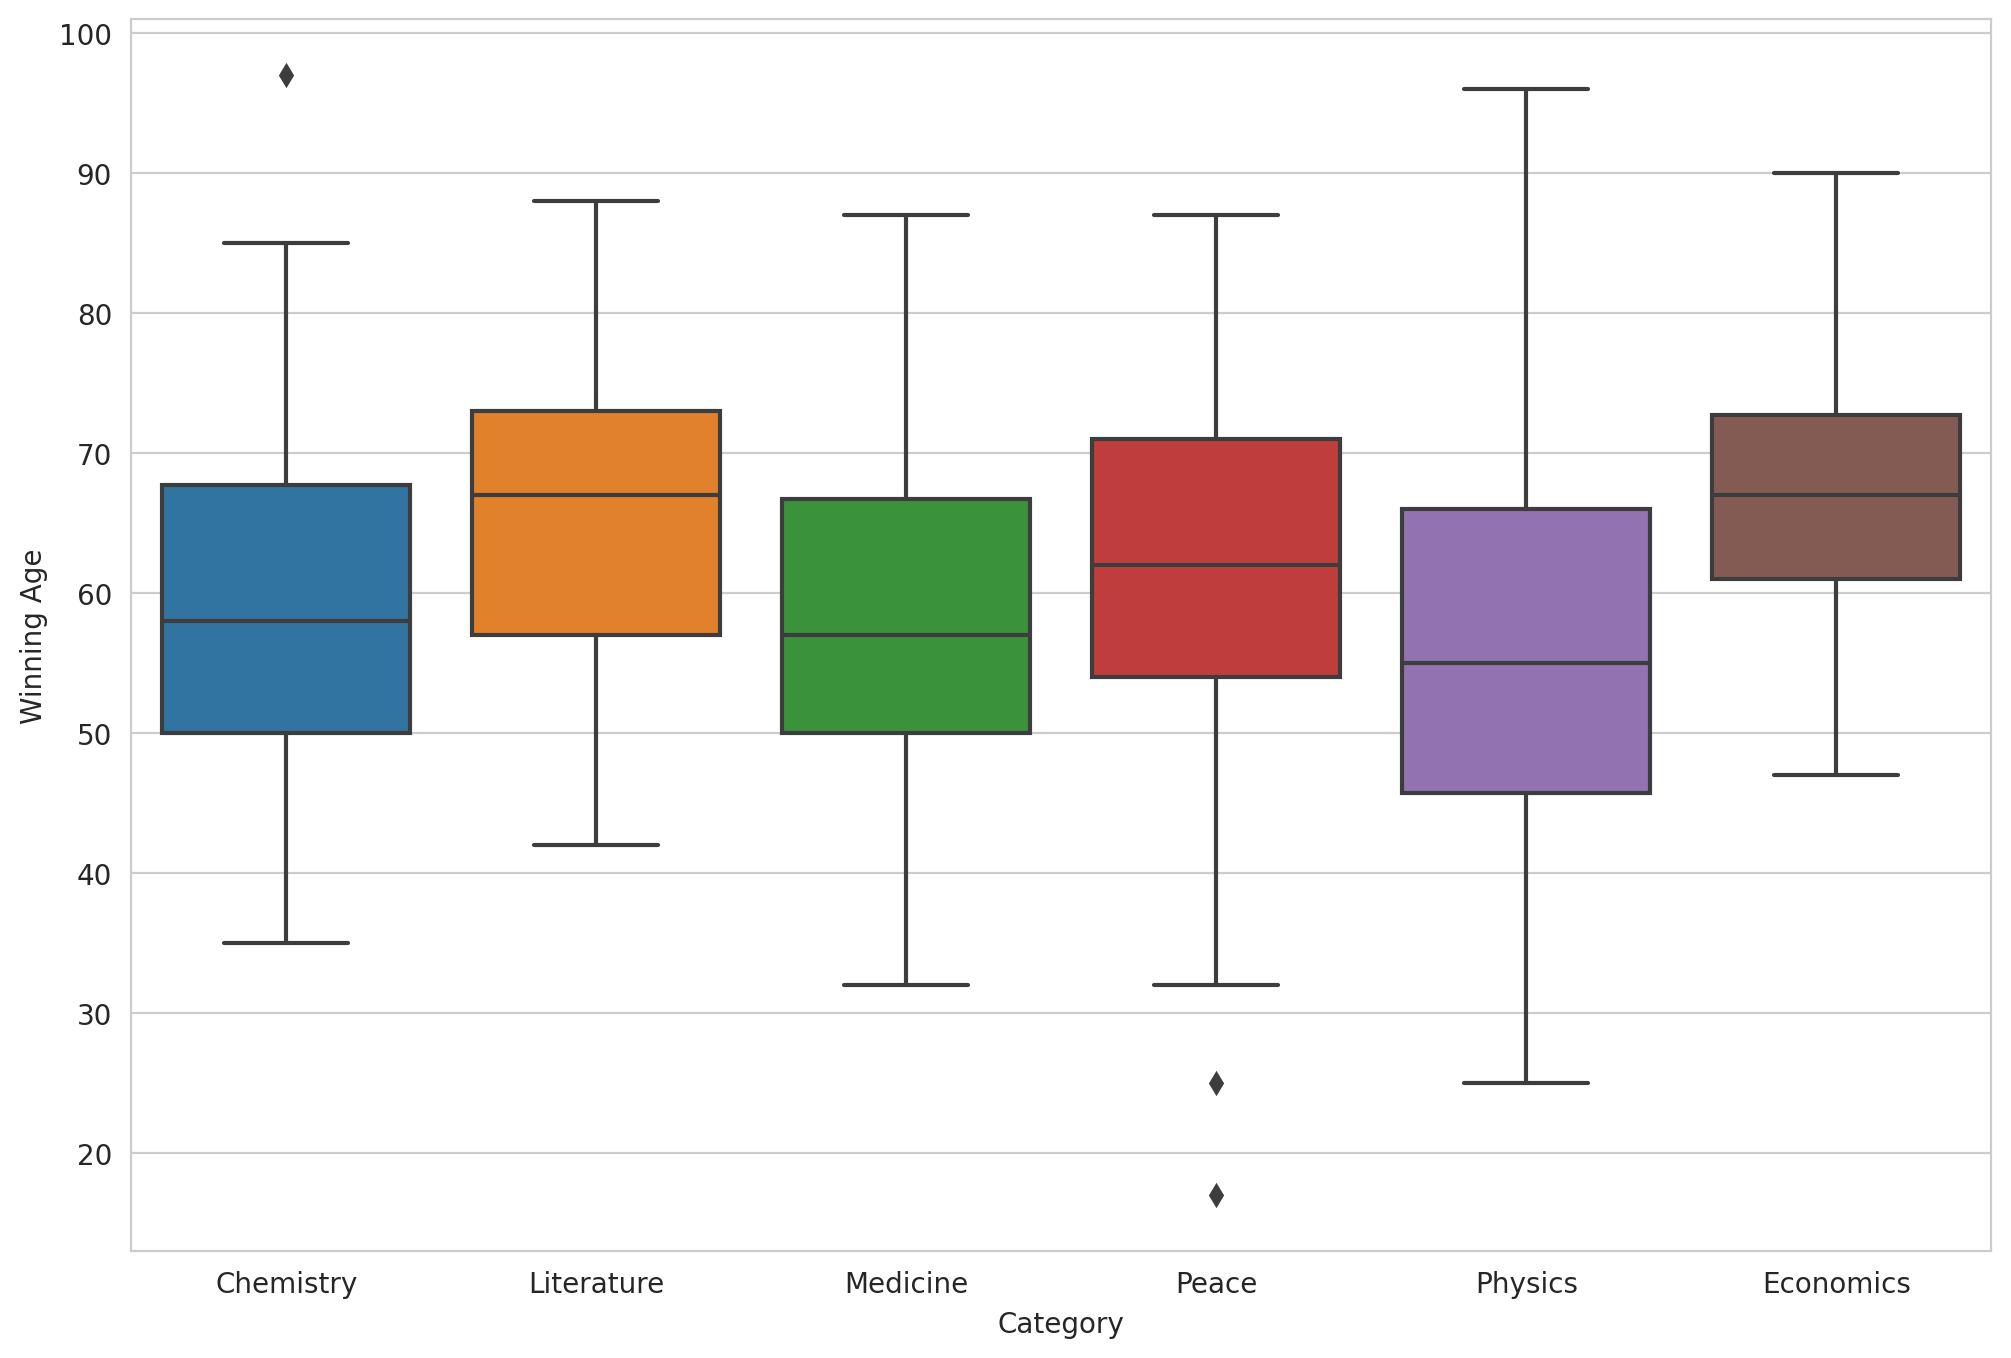

In [58]:
plt.figure(figsize=(12,8), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df,
                x="category",
                y="winning_age")
    
plt.xlabel("Category")
plt.ylabel("Winning Age")
    
plt.show()

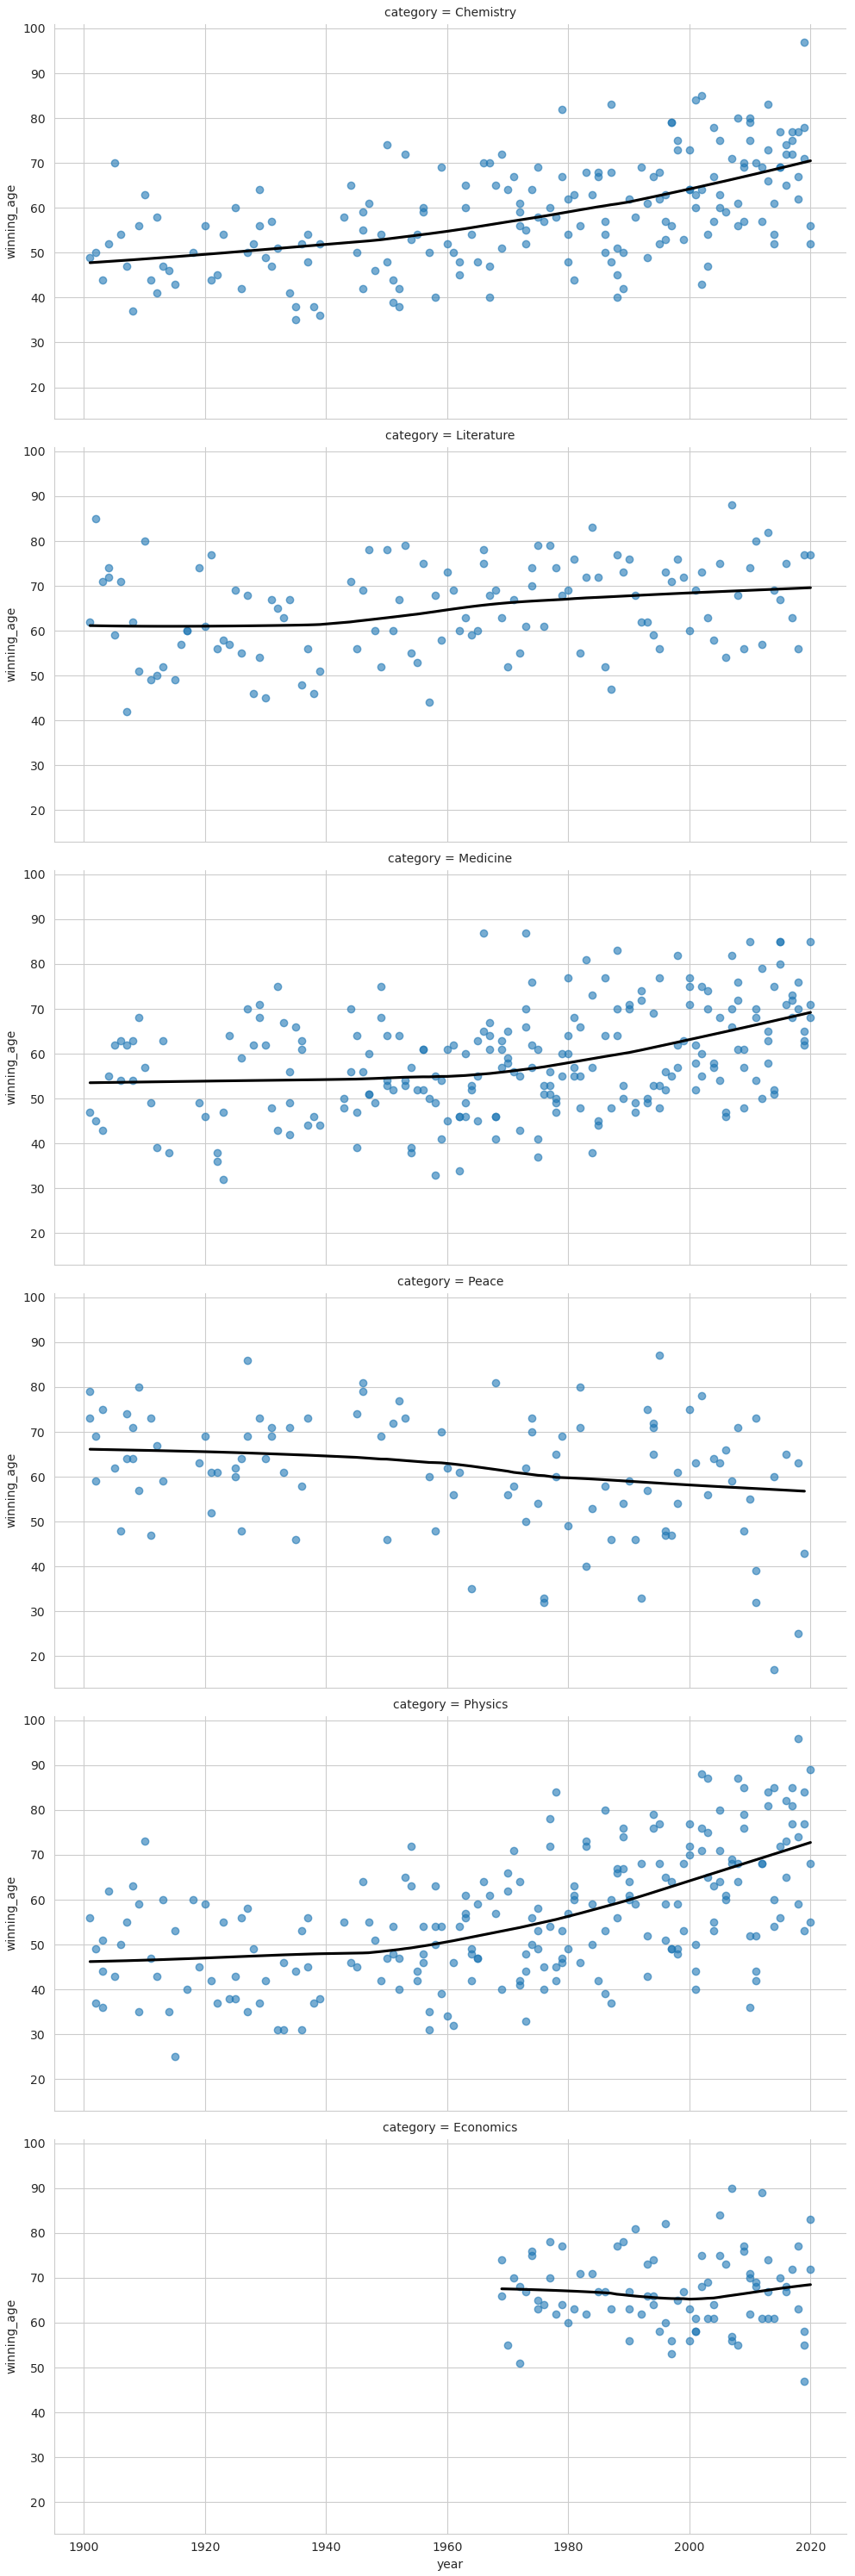

In [59]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
 
plt.show()

We see that winners in physics, chemistry, and medicine have gotten older over time. The ageing trend is strongest for physics. The average age used to be below 50, but now it's over 70. Economics, the newest category, is much more stable in comparison. The peace prize shows the opposite trend where winners are getting younger!

Lets combine the above plots into one plot.

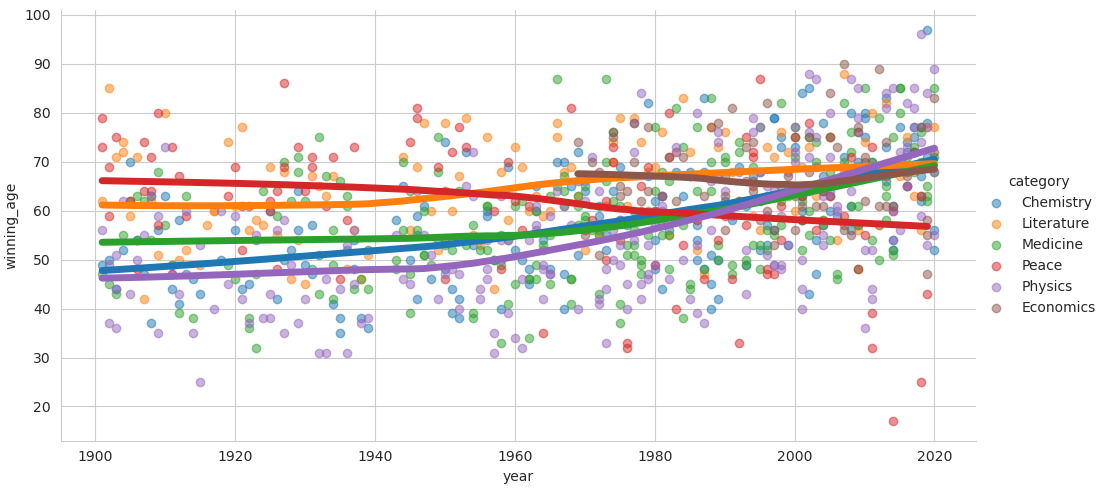

In [62]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})
 
plt.show()